### Dry Been Dataset

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset.xlsx
User uploaded file "Dry_Bean_Dataset.xlsx" with length 3043104 bytes


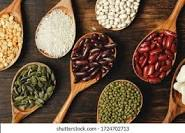

In [75]:
from IPython import display
display.Image("/content/Dry bean.jpg.jpg")

### Problem Statement:-
In given dataset there are 7 kinds of beens present we have to predict type of dry been based on different conditions.

These is a Multiclass Classification Problem. Based on Area, Perimeter, Calories,etc we have to predict the class of dry beens.

## Importing libraries:-¶

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [4]:
Data = pd.read_excel('Dry_Bean_Dataset.xlsx')
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
# Shape of dataset
Data.shape

(13611, 17)

There are 13611 rows and 17 columns in these data

In [6]:
# Extracting first five rows
Data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
# Extracting column names
Data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:
# Check Null values
Data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There is no null value in the given dataset

In [9]:
# Check the duplicate values in the dataset
Data.duplicated().sum()

68

In [10]:
# Delete the duplicate rows
Data.drop_duplicates(inplace = True)
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


After Deleting the duplicate rows 13543 rows are remaining which are not duplicated

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [12]:
Data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

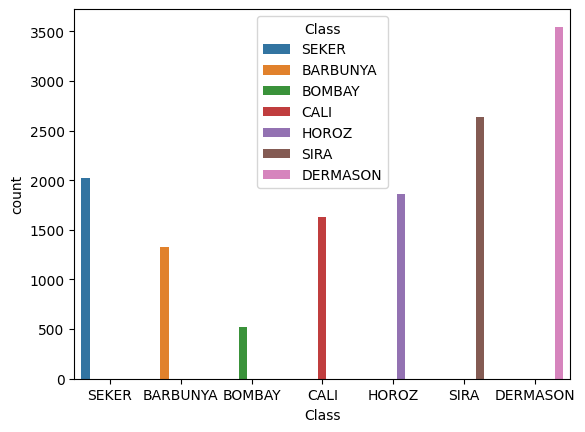

In [13]:
import seaborn as sns

sns.countplot(data=Data, x='Class', hue='Class')

From countplot we can see that here is the data imbalancing problem, We have to deal with these by using smoten method going forward.

### Multicollinearity :-
Here we how the one variable is related to other.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Check the multicolinearity by using VIF
df = Data.drop(['Class'],axis=1)
vif=pd.DataFrame({'variables':df.columns})
vif['vif']=[variance_inflation_factor(df.values,i)
           for i in range(len(df.columns))]
vif

,variables,vif
0,Area,3.443408e+05
1,Perimeter,6.021611e+04
2,MajorAxisLength,1.317358e+06
3,MinorAxisLength,1.652830e+06
4,AspectRation,1.682818e+05
5,Eccentricity,2.341323e+04
6,ConvexArea,3.321269e+05
7,EquivDiameter,6.100438e+06
8,Extent,2.933328e+02
9,Solidity,6.280427e+05


If we consider a vif value 8 as threshold then there is no any variable highly corellated or showing multicolinearity.

### See correlation by using heatmap¶

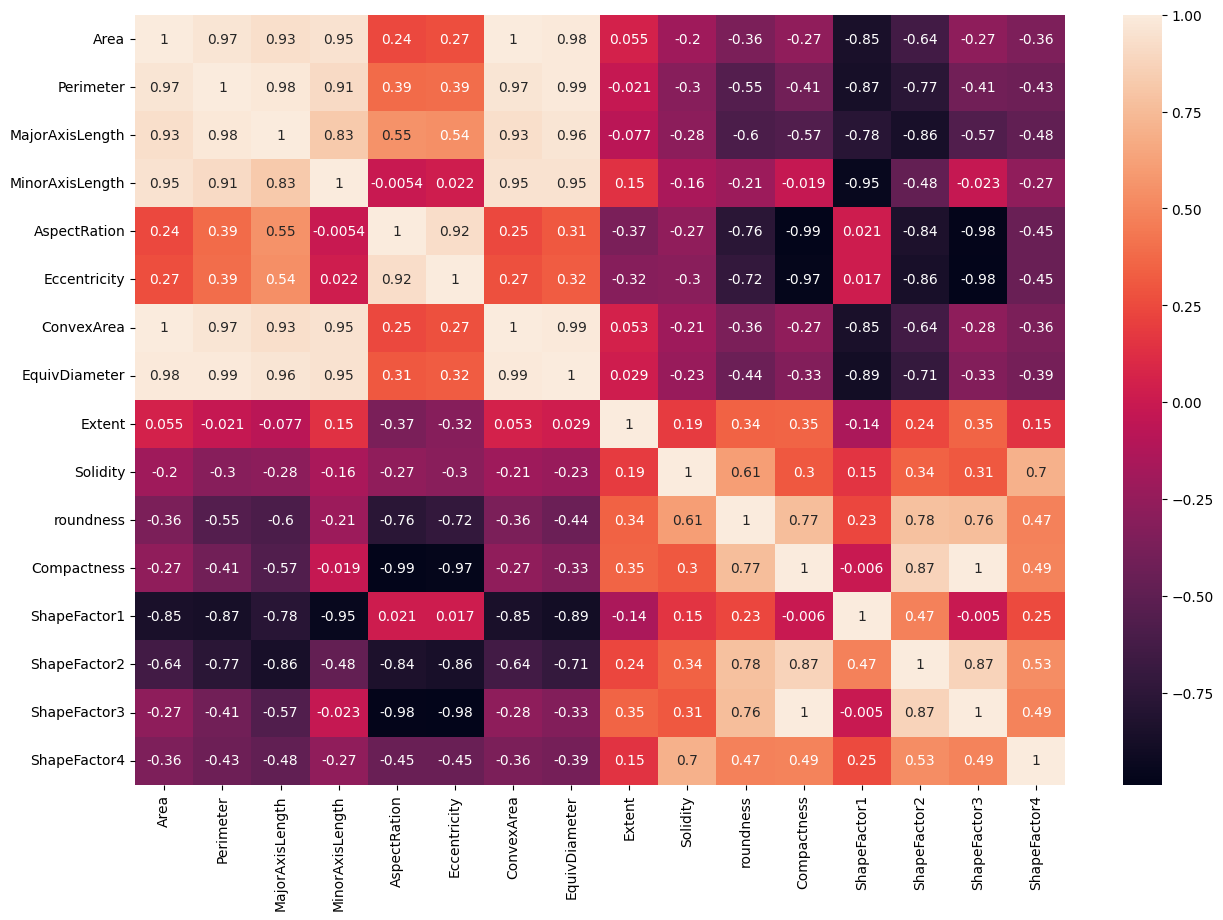

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Converting Class into numeric variable

In [17]:
Data['class']=pd.factorize(Data['Class'])[0]
Data.drop(['Class'],axis=1,inplace=True)


In [18]:
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


In [19]:
Data['class'].value_counts()

6    3546
5    2636
0    2027
4    1860
3    1630
1    1322
2     522
Name: class, dtype: int64

Distribution of all the variables

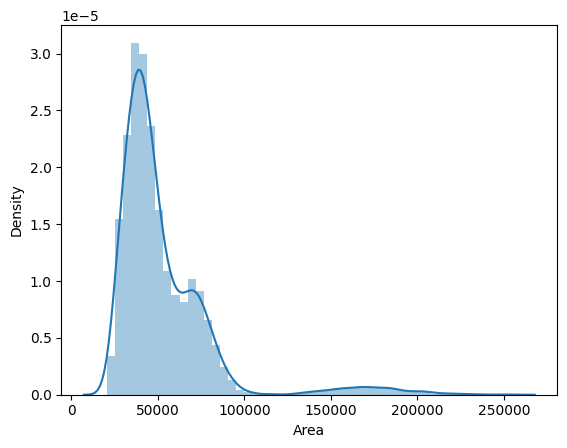

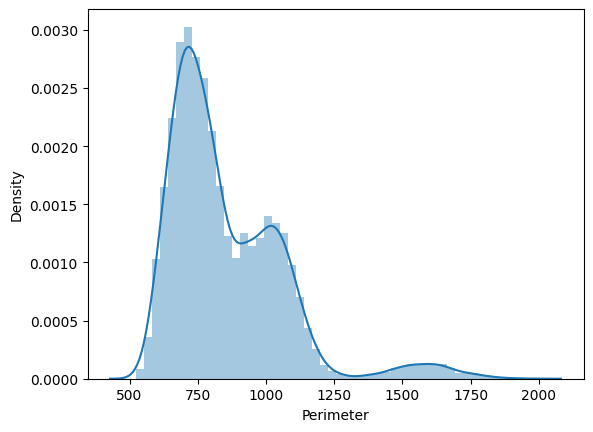

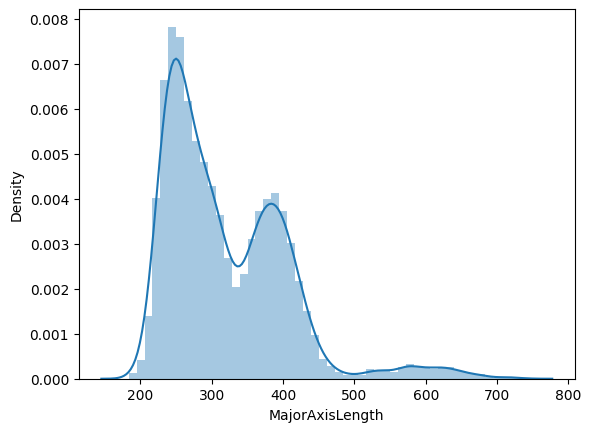

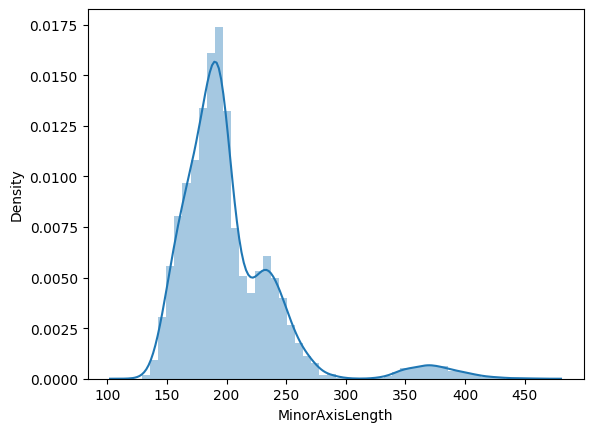

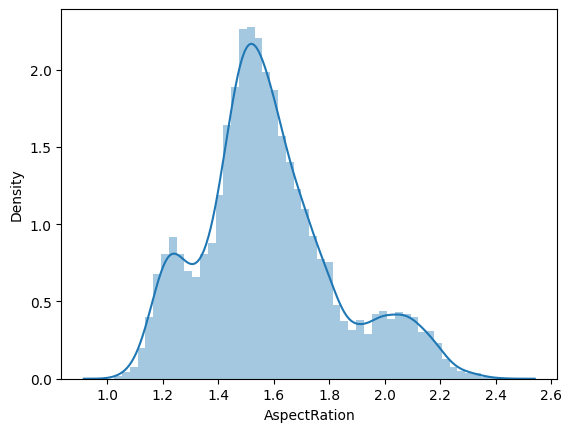

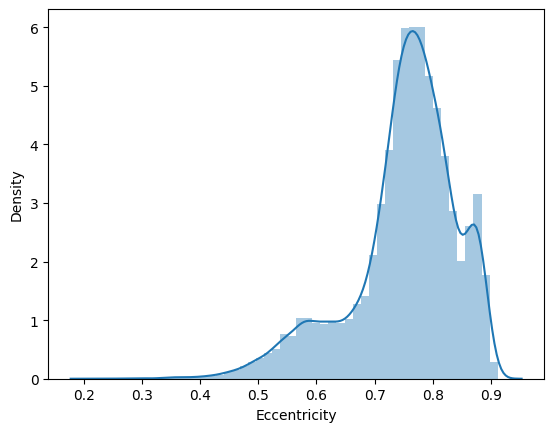

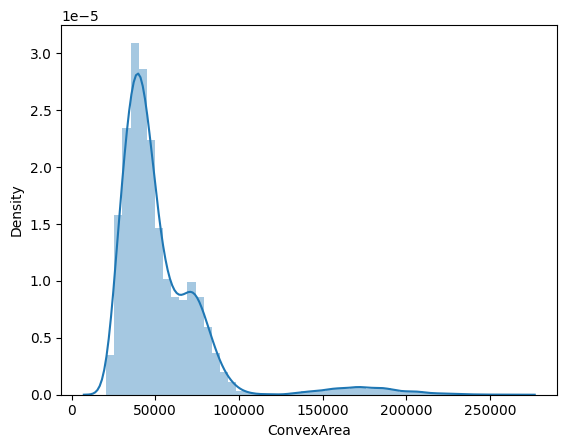

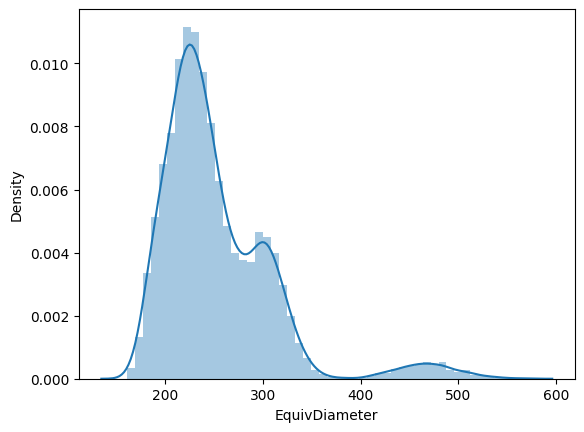

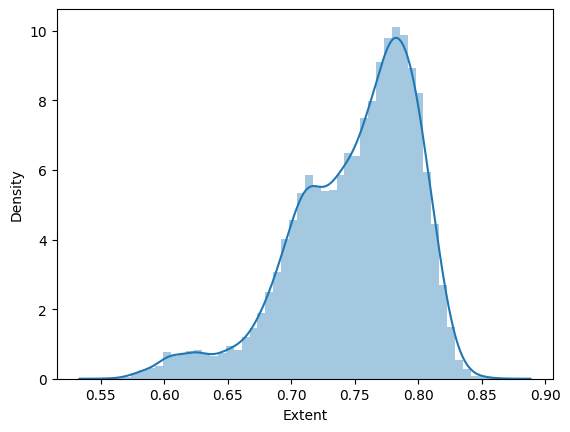

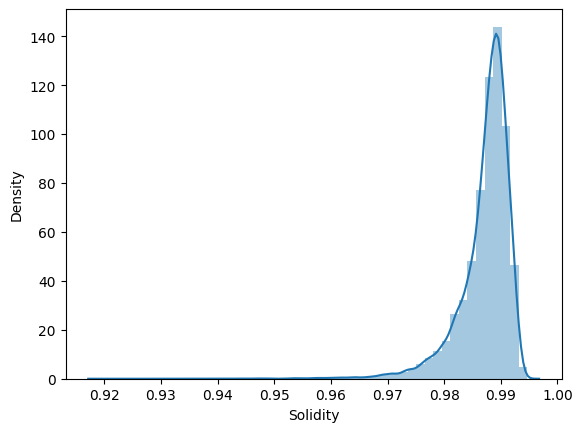

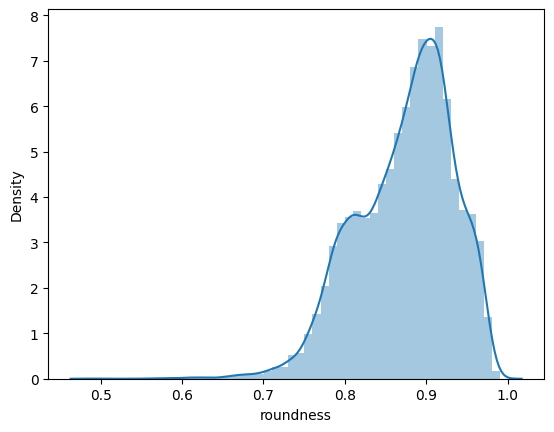

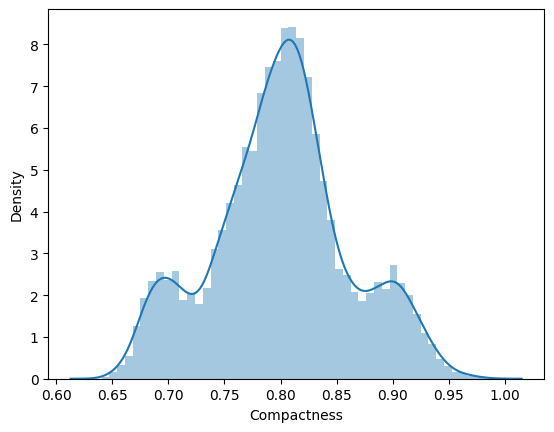

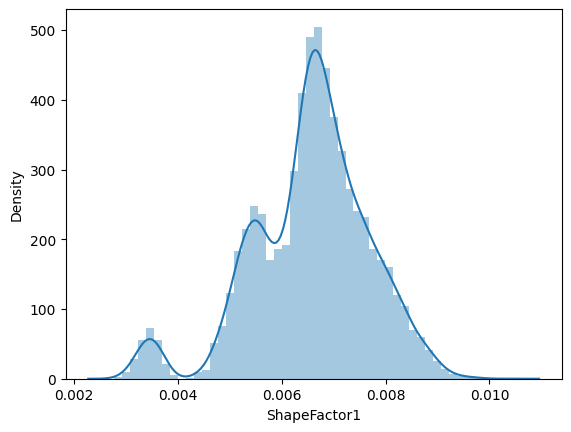

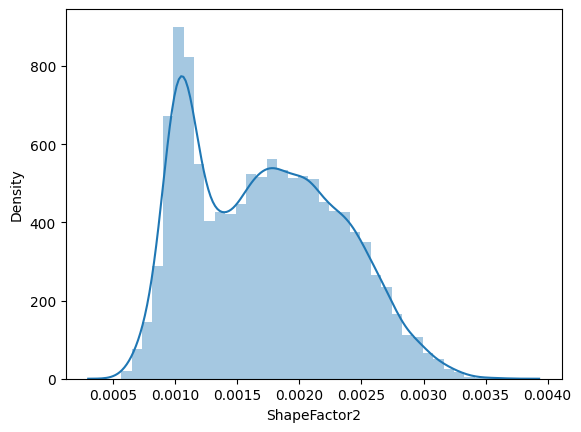

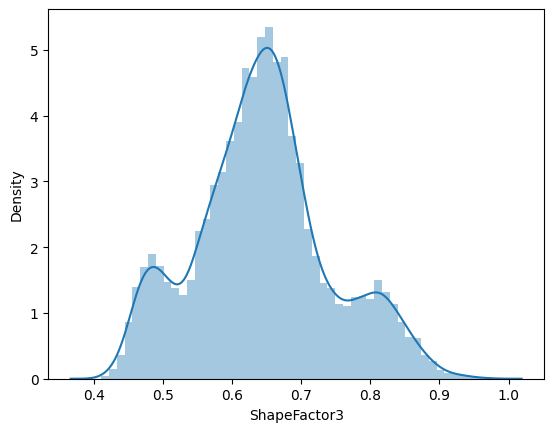

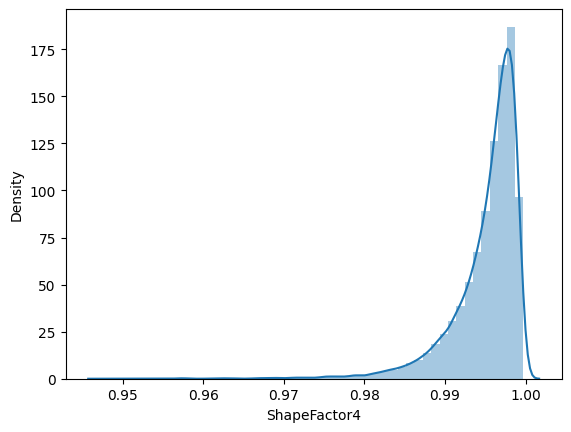

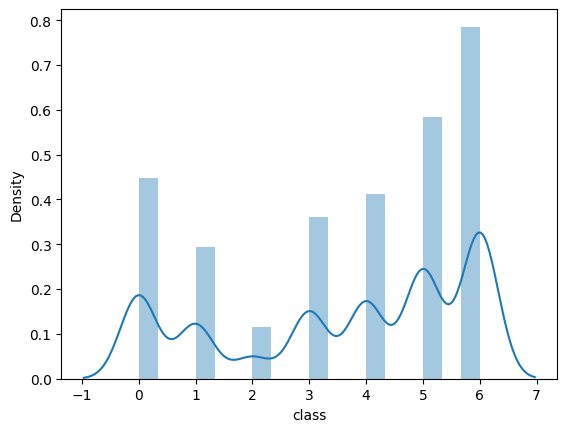

In [20]:
for i in Data.columns:
    sns.distplot(Data[i])
    plt.show()

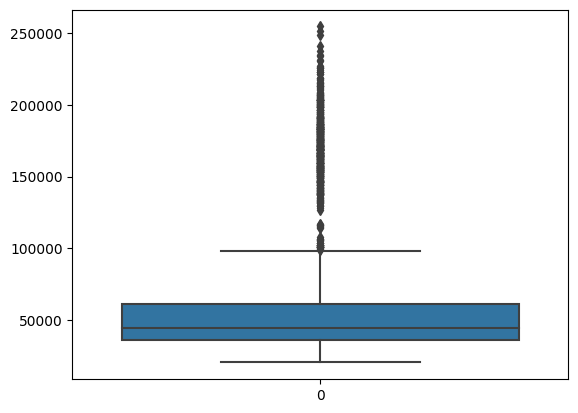

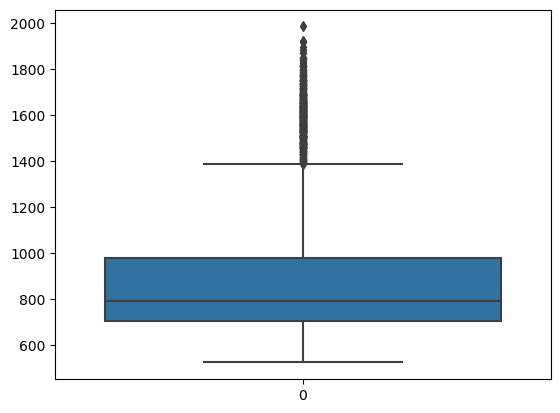

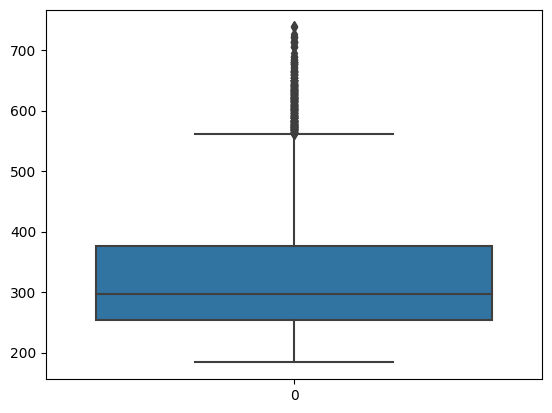

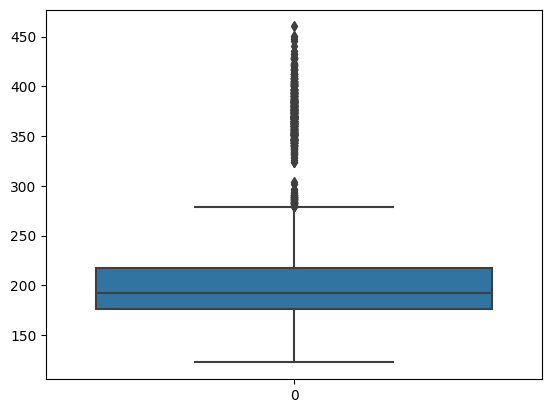

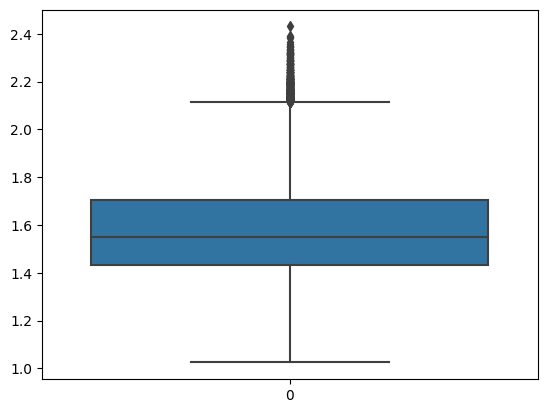

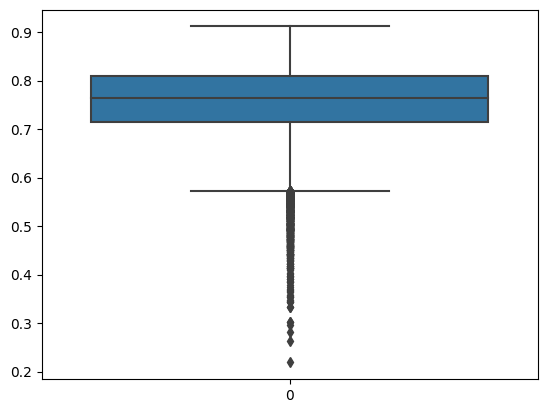

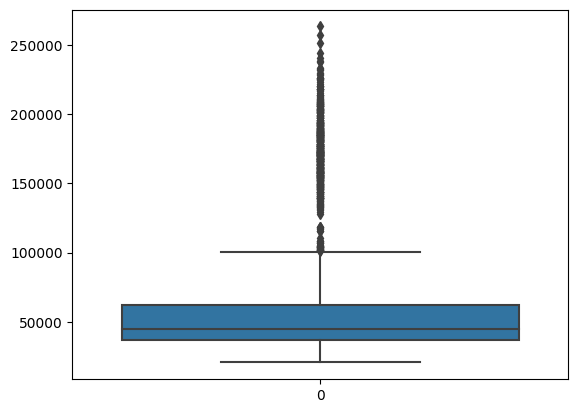

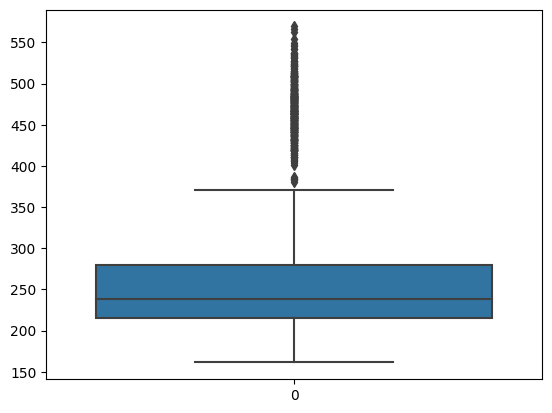

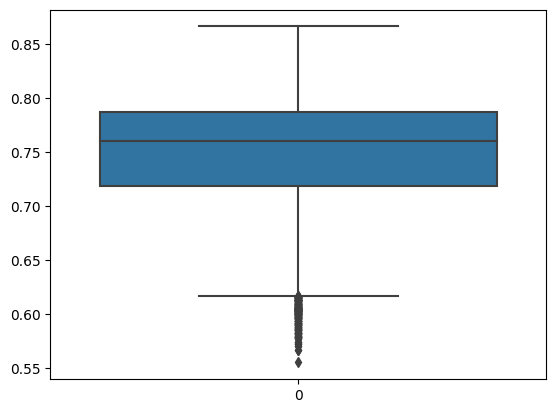

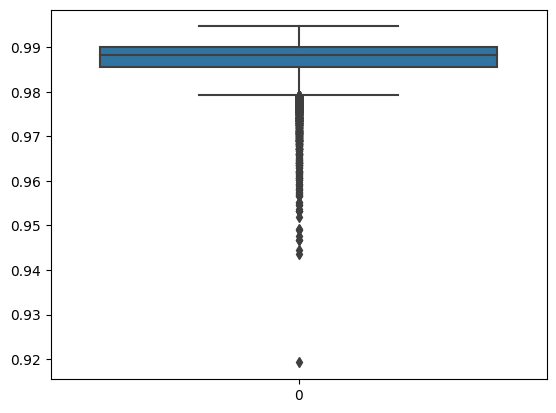

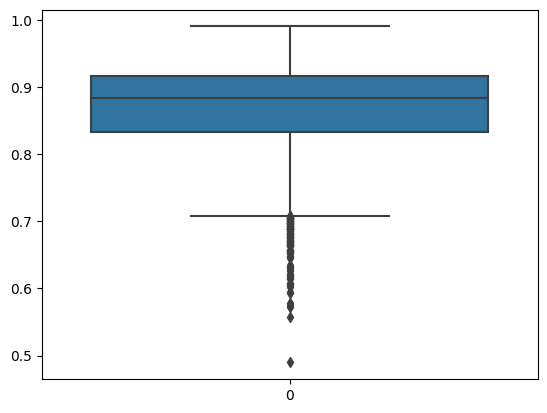

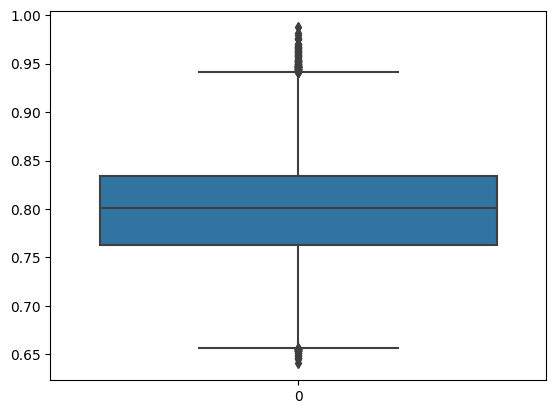

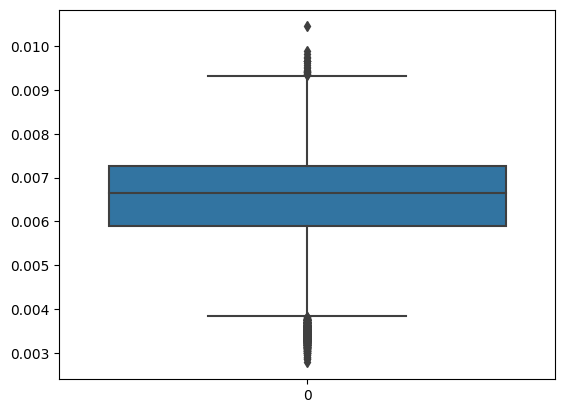

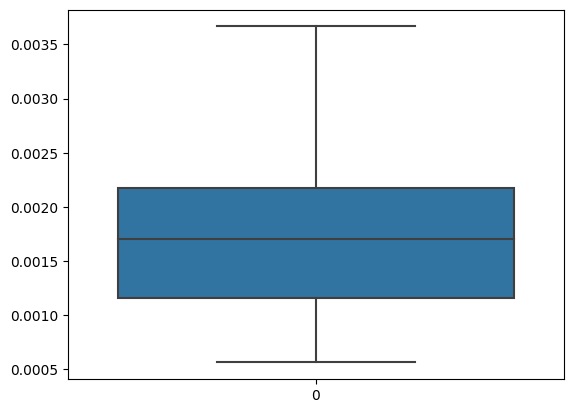

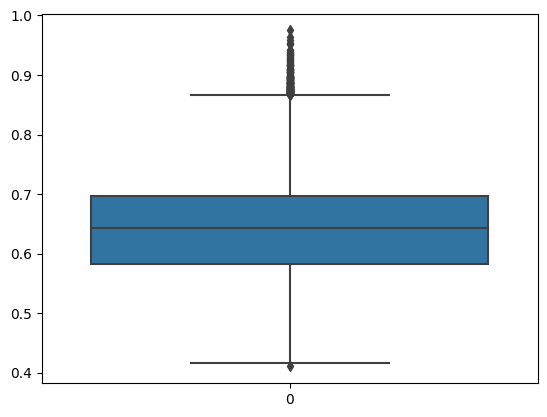

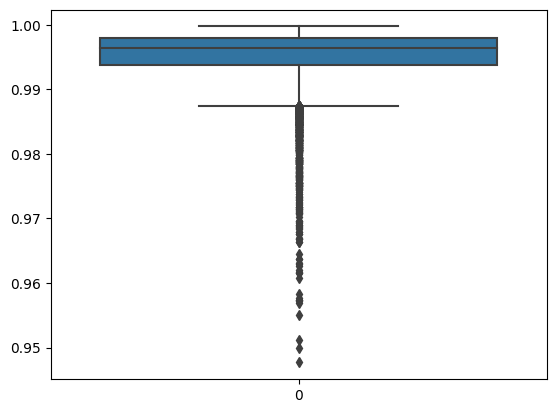

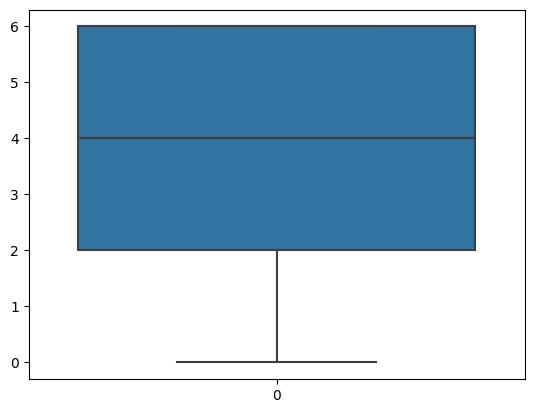

In [ ]:
for i in Data.columns:
    sns.boxplot(Data[i])
    plt.show()

### Outlier Treatment:-

In [ ]:
for i in Data.columns:
    Q1=np.quantile(Data[i],0.25)
    Q2=np.quantile(Data[i],0.50)
    Q3=np.quantile(Data[i],0.75)
    Q4=np.quantile(Data[i],1.0)
    IQR=Q3-Q1
    print("IQR=",IQR)
    Lower_Fence=Q1-(1.5*IQR)
    Upper_Fence=Q3+(1.5*IQR)
    print("Lower_Fence=", i +" = "+ str(Lower_Fence) )
    print("Upper_Fence=", i +" = "+ str(Upper_Fence) )
    print()

IQR= 25099.5
Lower_Fence= Area = -1366.75
Upper_Fence= Area = 99031.25

IQR= 273.9164999999999
Lower_Fence= Perimeter = 292.3552500000001
Upper_Fence= Perimeter = 1388.0212499999998

IQR= 123.22568242046248
Lower_Fence= MajorAxisLength = 68.24828273067908
Upper_Fence= MajorAxisLength = 561.151012412529

IQR= 41.35904641301232
Lower_Fence= MinorAxisLength = 113.84778744577955
Upper_Fence= MinorAxisLength = 279.28397309782883

IQR= 0.2732542047555564
Lower_Fence= AspectRation = 1.0207802776767525
Upper_Fence= AspectRation = 2.113797096698978

IQR= 0.0945275786626778
Lower_Fence= Eccentricity = 0.5733524682314981
Upper_Fence= Eccentricity = 0.9514627828822093

IQR= 25687.0
Lower_Fence= ConvexArea = -1857.5
Upper_Fence= ConvexArea = 100890.5

IQR= 64.62707346184635
Lower_Fence= EquivDiameter = 117.9926669054926
Upper_Fence= EquivDiameter = 376.500960752878

IQR= 0.0681136547460438
Lower_Fence= Extent = 0.6165646627040451
Upper_Fence= Extent = 0.8890192816882203

IQR= 0.004340454790551451
L

In [21]:
Data1=Data.copy()

In [22]:
Data1['Area']=np.where(Data1['Area']>99031.25,99031.25,
                         np.where(Data1['Area']<-1366.75,-1366.75,Data1['Area']))

In [23]:
Data1['Perimeter']=np.where(Data1['Perimeter']>1388.0212500000002,1388.0212500000002,
                         np.where(Data1['Perimeter']<292.35524999999996,292.35524999999996,Data1['Perimeter']))

Data1['MajorAxisLength'] = np.where(Data1['MajorAxisLength']>561.15101,561.15101,
                         np.where(Data1['MajorAxisLength']<68.2482,68.2482,Data1['MajorAxisLength']))

Data1['MinorAxisLength'] = np.where(Data1['MinorAxisLength']> 279.2839, 279.2839,
                         np.where(Data1['MinorAxisLength']<113.847,113.847,Data1['MinorAxisLength']))

Data1['AspectRation'] = np.where(Data1['AspectRation']>2.113 , 2.113,
                         np.where(Data1['AspectRation']<1.020,1.020,Data1['AspectRation']))


Data1['Eccentricity'] = np.where(Data1['Eccentricity']>0.951 , 0.951,
                         np.where(Data1['Eccentricity']< 0.573, 0.573,Data1['Eccentricity']))


Data1['ConvexArea'] =  np.where(Data1['ConvexArea']>100890.5 , 100890.5,
                         np.where(Data1['ConvexArea']< -1857.5,-1857.5,Data1['ConvexArea']))


Data1['EquivDiameter'] =np.where(Data1['EquivDiameter']>376.50 ,376.50 ,
                         np.where(Data1['EquivDiameter']< 117.99,117.99,Data1['EquivDiameter']))


Data1['Extent'] = np.where(Data1['Extent']>0.889 ,0.889 ,
                         np.where(Data1['Extent']<0.616 ,0.616,Data1['Extent']))


Data1['Solidity'] = np.where(Data1['Solidity']> 0.9965294083655845 , 0.9965294083655845 ,
                         np.where(Data1['Solidity']<0.9791675892033764 ,0.9791675892033764,Data1['Solidity']))


Data1['roundness'] = np.where(Data1['roundness']>1.0424631477470463 ,1.0424631477470463,
                         np.where(Data1['roundness']< 0.7079773536884043 , 0.7079773536884043,Data1['roundness']))



Data1['Compactness'] = np.where(Data1['Compactness']>0.9413,0.9413 ,
                         np.where(Data1['Compactness']< 0.6563,0.6563,Data1['Compactness']))



Data1['ShapeFactor1'] =np.where(Data1['ShapeFactor1']> 0.0093, 0.0093 ,
                         np.where(Data1['ShapeFactor1']< 0.0038,0.0038,Data1['ShapeFactor1']))


Data1['ShapeFactor2'] =  np.where(Data1['ShapeFactor2']>0.00369 ,0.00369 ,
                         np.where(Data1['ShapeFactor2']<-0.00036309 ,-0.00036309,Data1['ShapeFactor2']))


Data1['ShapeFactor3'] = np.where(Data1['ShapeFactor3']> 0.8670755181664107,0.8670755181664107 ,
                         np.where(Data1['ShapeFactor3']<0.4117822166871663 ,0.4117822166871663,Data1['ShapeFactor3']))


Data1['ShapeFactor4'] = np.where(Data1['ShapeFactor4']>1.004148560963359 ,1.004148560963359,
                         np.where(Data1['ShapeFactor4']<0.9874627108335132 ,0.9874627108335132,Data1['ShapeFactor4']))

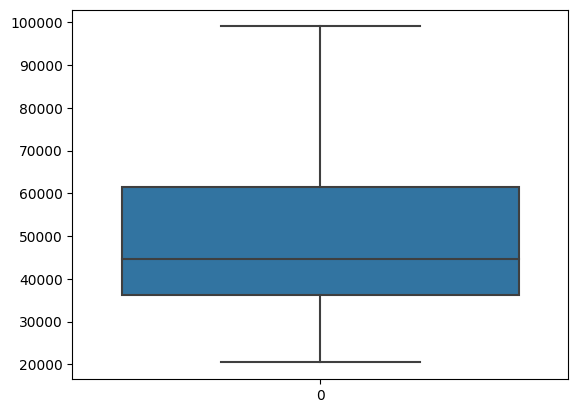

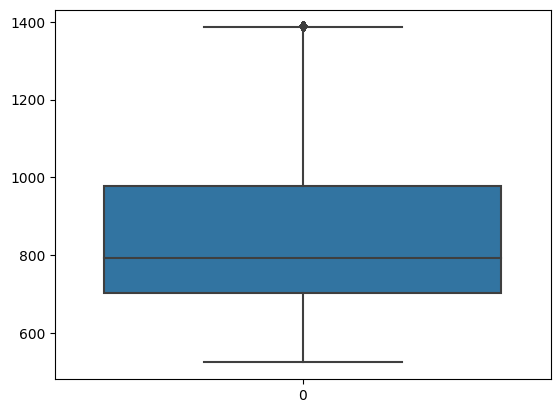

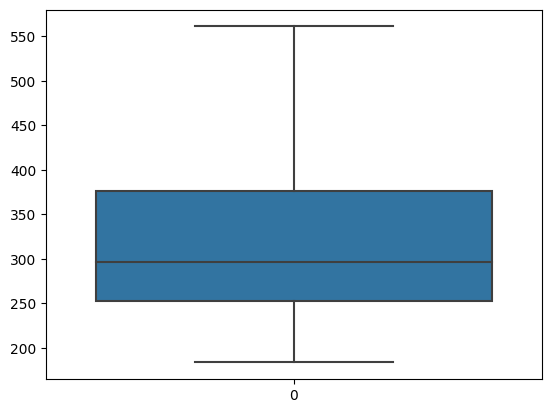

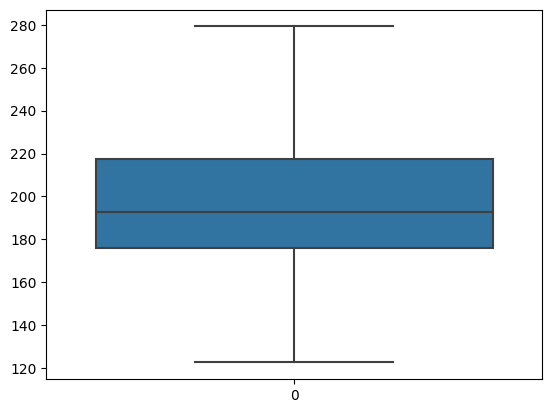

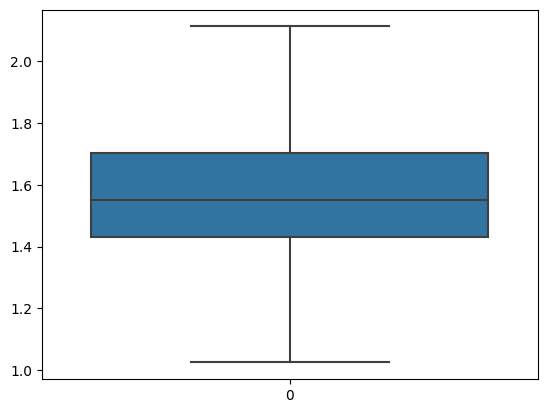

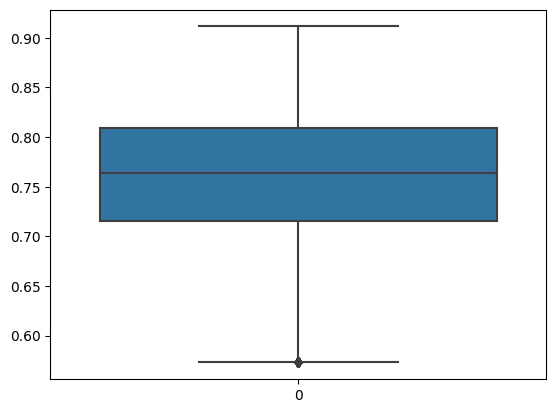

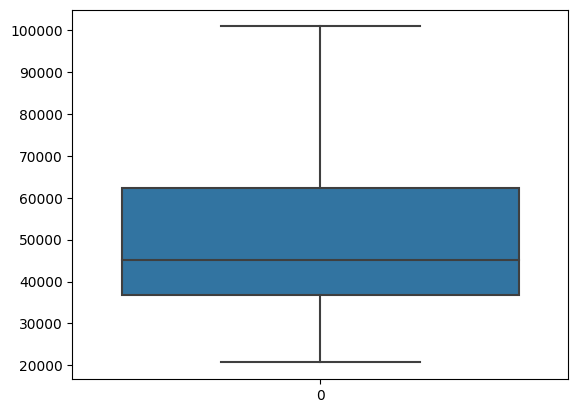

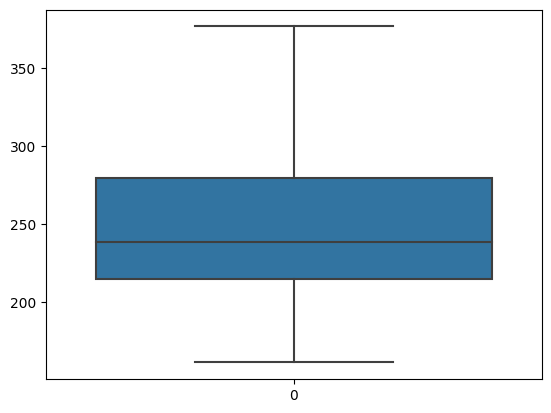

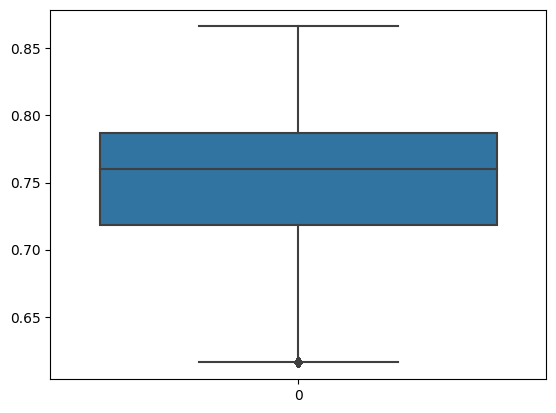

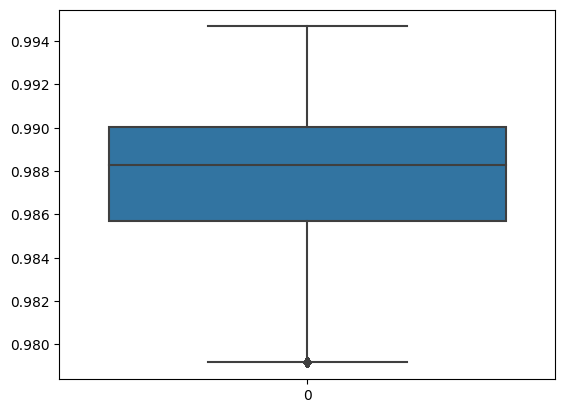

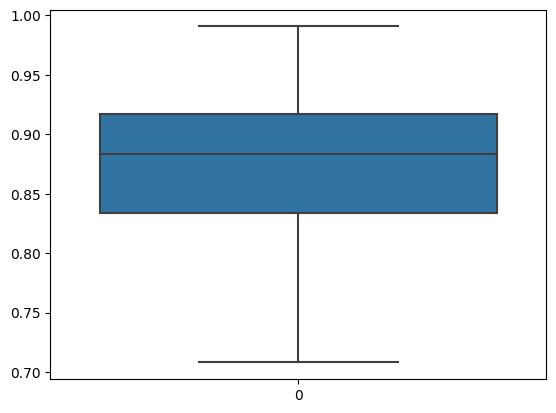

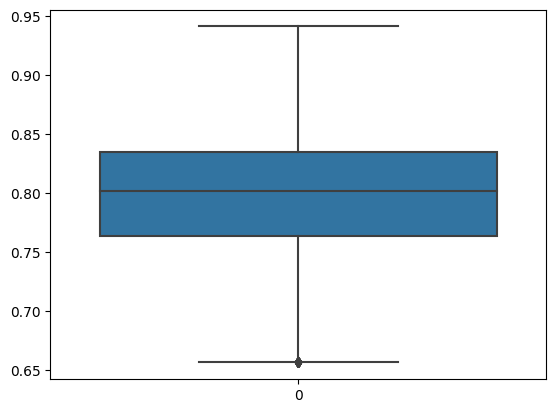

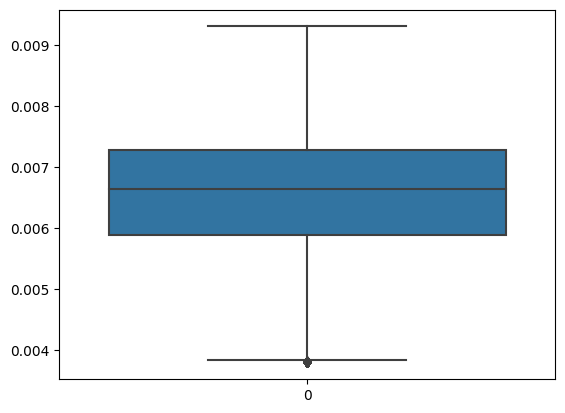

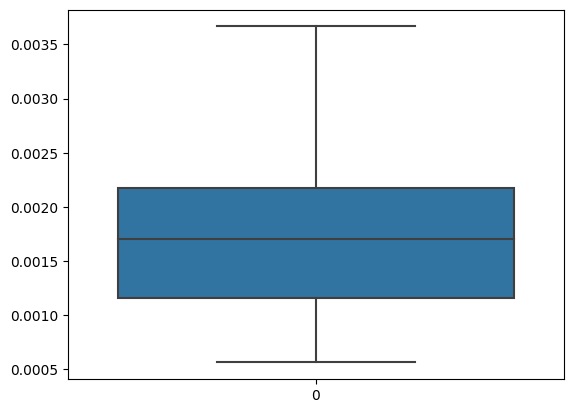

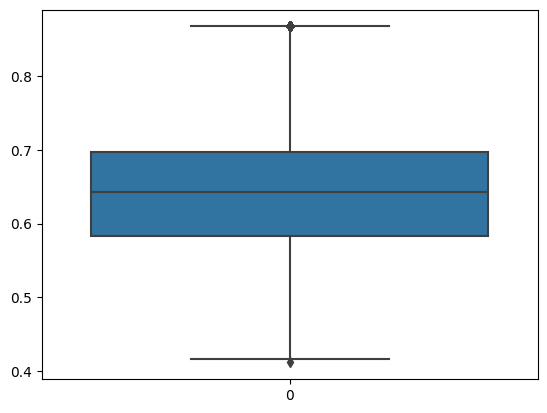

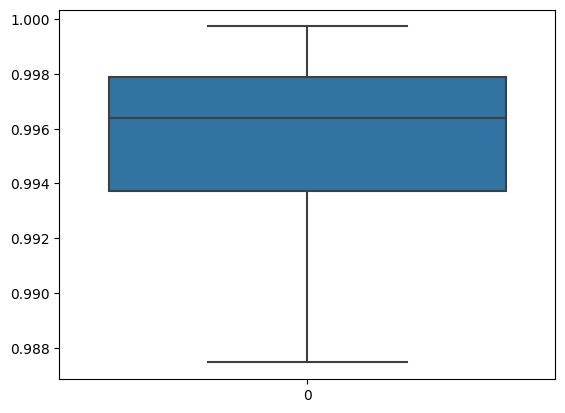

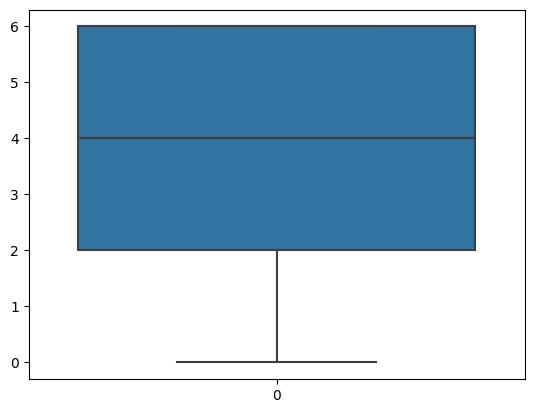

In [24]:
for i in Data1.columns:
    sns.boxplot(Data1[i])
    plt.show()

### Distribution

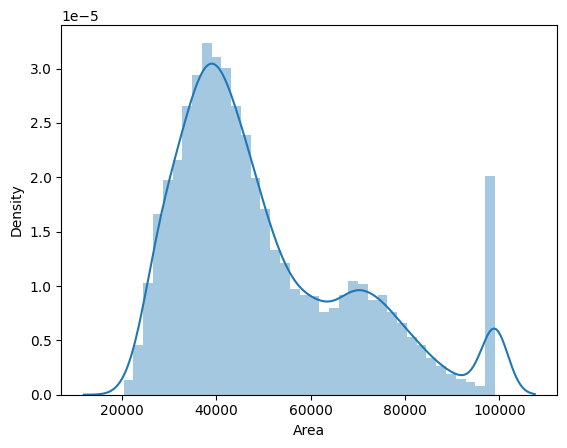

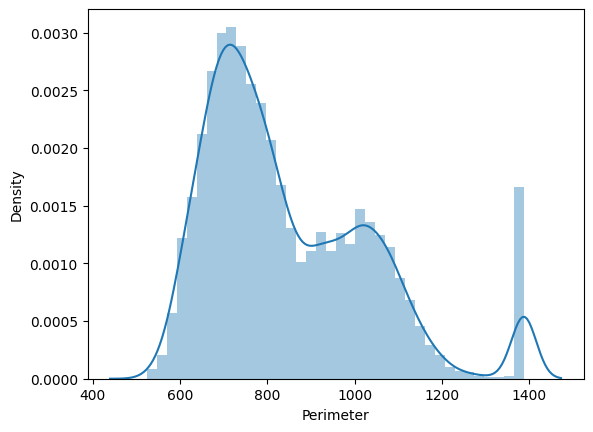

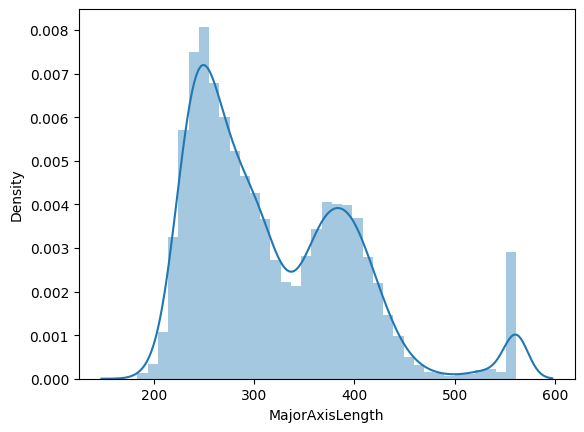

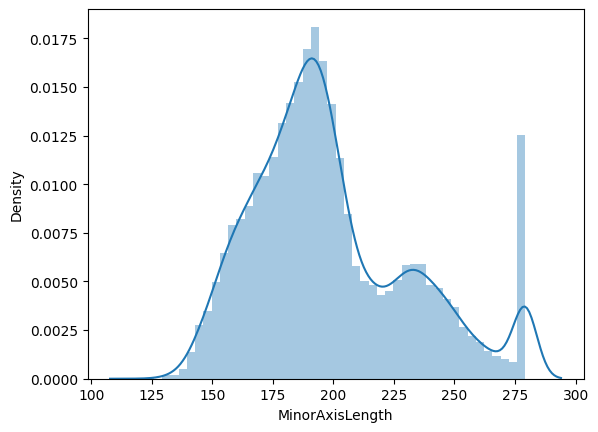

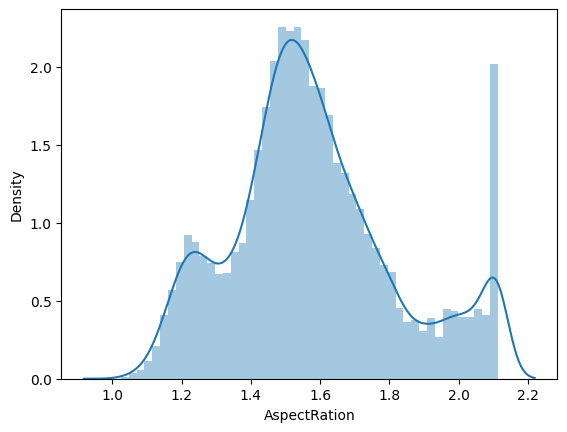

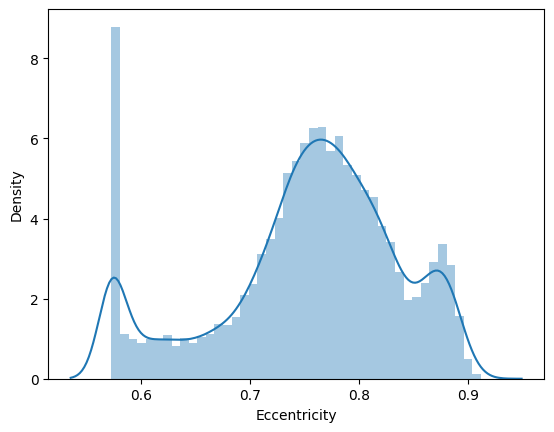

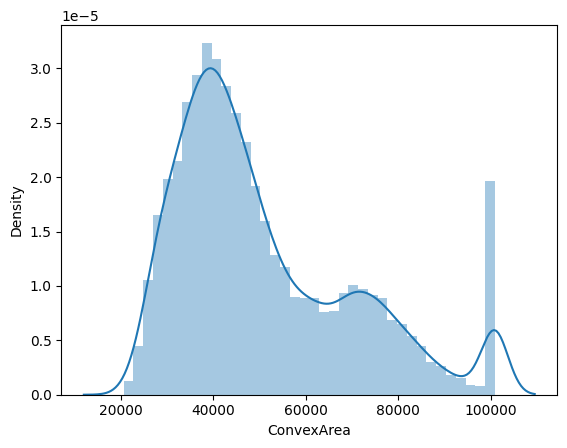

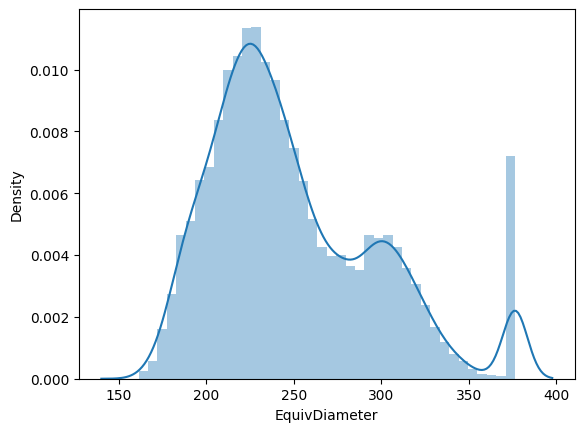

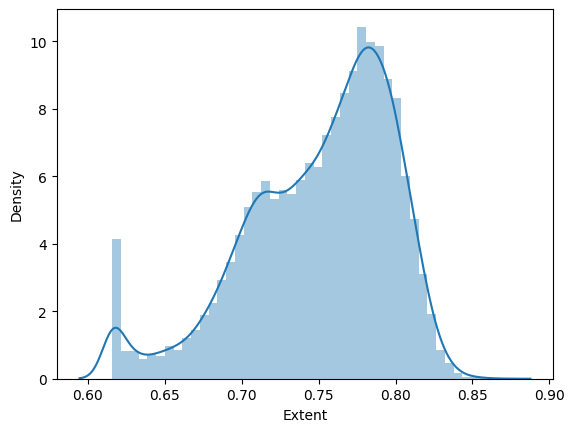

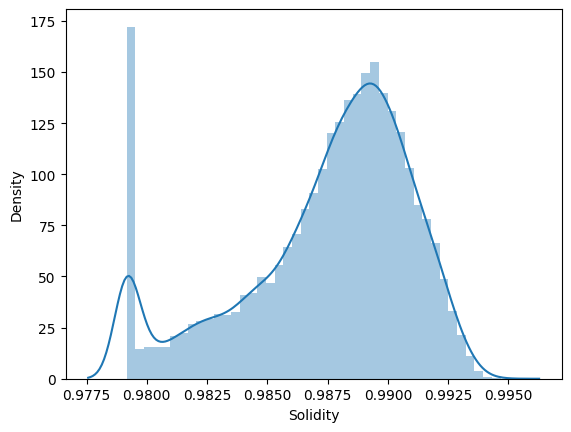

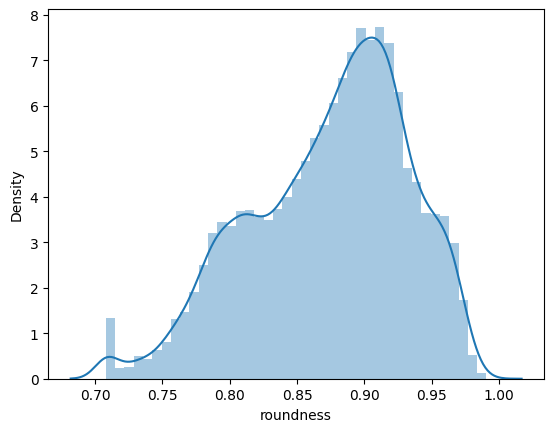

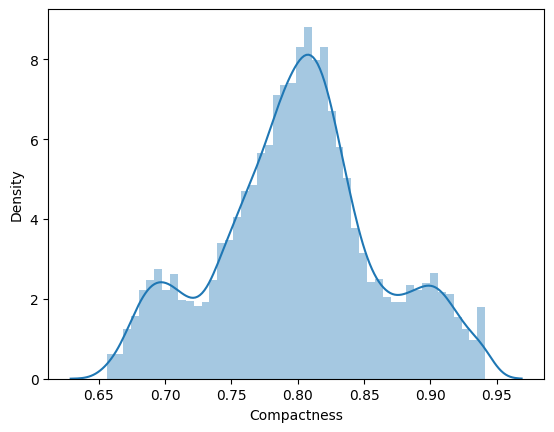

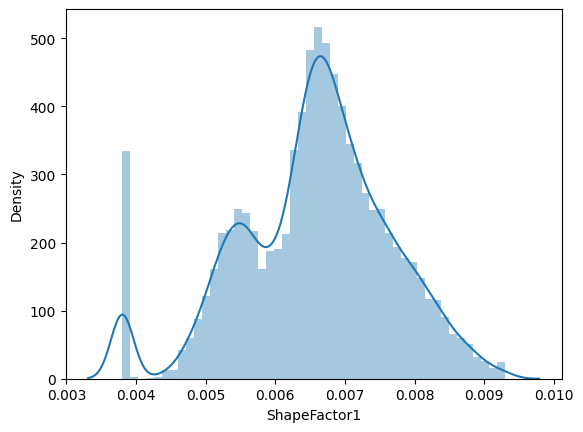

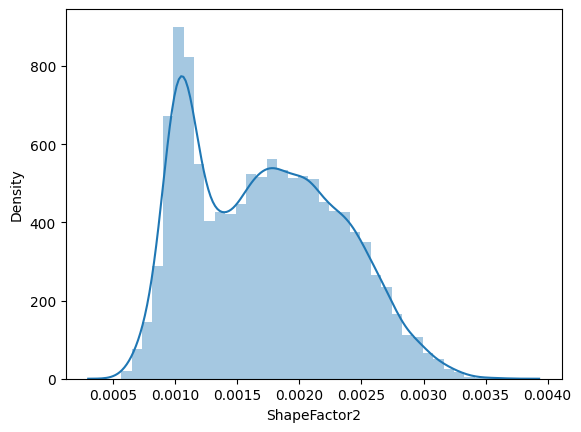

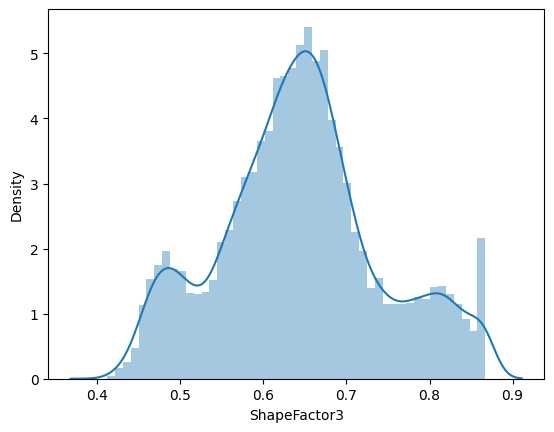

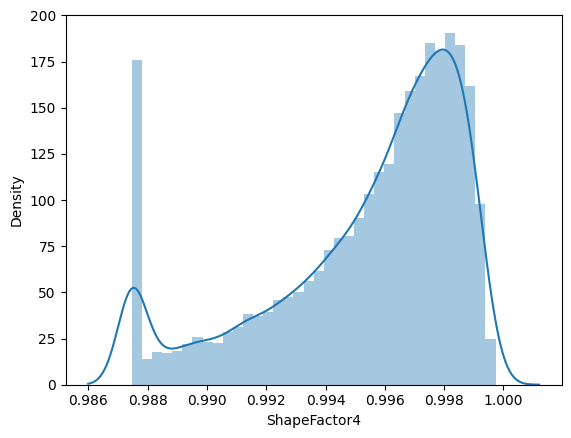

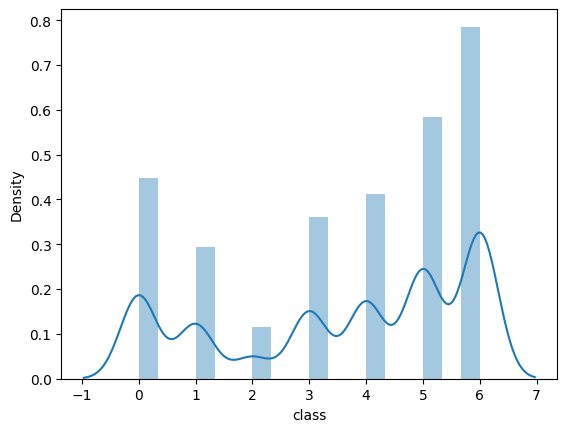

In [25]:
for i in Data1.columns:
    sns.distplot(Data1[i])
    plt.show()

In [26]:
Data1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573000,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573000,29172.0,191.272750,0.783968,0.984986,0.887034,0.941300,0.006979,0.003564,0.867076,0.998430,0
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573000,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573000,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573000,30417.0,195.896503,0.773098,0.990893,0.984877,0.941300,0.006697,0.003665,0.867076,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


Seperating Dependent variable from independent variable

In [27]:
X=Data1.drop(['class'],axis=1)
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395.0,610.291,208.178117,173.888747,1.197191,0.573000,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734.0,638.018,200.524796,182.734419,1.097356,0.573000,29172.0,191.272750,0.783968,0.984986,0.887034,0.941300,0.006979,0.003564,0.867076,0.998430
2,29380.0,624.110,212.826130,175.931143,1.209713,0.573000,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008.0,645.884,210.557999,182.516516,1.153638,0.573000,30724.0,195.467062,0.782681,0.979168,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140.0,620.134,201.847882,190.279279,1.060798,0.573000,30417.0,195.896503,0.773098,0.990893,0.984877,0.941300,0.006697,0.003665,0.867076,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [28]:
Y = Data1['class']
Y

0        0
1        0
2        0
3        0
4        0
        ..
13606    6
13607    6
13608    6
13609    6
13610    6
Name: class, Length: 13543, dtype: int64

In [29]:
X.shape,Y.shape

((13543, 16), (13543,))

### smoten method

In [30]:
from collections import Counter

In [31]:
from imblearn.over_sampling import SMOTEN
Smoten = SMOTEN()
Xr,Yr = Smoten.fit_resample(X,Y)

In [32]:
Xr.shape,Yr.shape

((24822, 16), (24822,))

In [33]:
print('Actual {}'.format(Counter(Y)))
print('Resample {}'.format(Counter(Yr)))

Actual Counter({6: 3546, 5: 2636, 0: 2027, 4: 1860, 3: 1630, 1: 1322, 2: 522})
Resample Counter({0: 3546, 1: 3546, 2: 3546, 3: 3546, 4: 3546, 5: 3546, 6: 3546})


In [34]:
Yr.value_counts()

0    3546
1    3546
2    3546
3    3546
4    3546
5    3546
6    3546
Name: class, dtype: int64

### Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std = StandardScaler()

In [37]:
X1 = std.fit_transform(Xr)
X1

array([[-1.33109958, -1.37116879, -1.40647282, ...,  2.64629385,
         2.15590881,  1.32423268],
       [-1.31606472, -1.25306332, -1.48063097, ...,  3.29499504,
         2.46943236,  1.24880967],
       [-1.2874142 , -1.31230561, -1.3614351 , ...,  2.49117326,
         2.07620629,  1.41216568],
       ...,
       [-0.54627056, -0.55220852, -0.52061951, ...,  0.08144859,
        -0.09218817, -0.06841847],
       [-0.86209151, -0.77848184, -0.74755772, ..., -0.03626061,
        -0.18286898,  0.06306915],
       [-0.54627056, -0.55220852, -0.52061951, ...,  0.08144859,
        -0.09218817, -0.06841847]])

Spliting Data into training and testing

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Yr,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19857, 16), (4965, 16), (19857,), (4965,))

### Model Building:-
#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=lg.predict(x_test)
y_pred

array([2, 6, 5, ..., 6, 5, 1])

In [41]:
lg.score(x_test,y_test)

0.95730110775428

In [42]:
lg.score(x_train,y_train)

0.9595105000755401

In [43]:
LR=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
LR

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,5
2669,1,1
10834,6,6
24694,5,5


### Confusion Matrix

In [44]:
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score,auc,roc_auc_score

In [45]:
con1=confusion_matrix(y_test,y_pred)
con1

array([[722,   5,   0,   0,   0,  11,   0],
       [  3, 686,   0,  10,   1,   6,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,  11,   0, 704,   4,   1,   0],
       [  0,   0,   0,   5, 676,   3,   2],
       [ 13,   1,   0,   1,   9, 631,  43],
       [ 14,   0,   0,   0,   4,  64, 643]])

In [46]:
Report=classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       738
           1       0.98      0.97      0.97       706
           2       1.00      1.00      1.00       691
           3       0.98      0.98      0.98       721
           4       0.97      0.99      0.98       686
           5       0.88      0.90      0.89       698
           6       0.93      0.89      0.91       725

    accuracy                           0.96      4965
   macro avg       0.96      0.96      0.96      4965
weighted avg       0.96      0.96      0.96      4965



### No. of Wrong Predictions¶

In [47]:
len(LR.loc[LR['Actual']!=LR['Predicted']])

212

### 2.Decission Tree

In [48]:
# Without GridsearchCv
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)


DecisionTreeClassifier()

In [49]:
y_pre_DT=DT.predict(x_test)

In [50]:
y_pre_DT

array([2, 6, 5, ..., 6, 5, 1])

In [51]:
DT.score(x_test,y_test)

0.9401812688821752

In [52]:
DT.score(x_train,y_train)

1.0

Here we can see that model may be overfited.

### By using Grid Search Cv

In [53]:
grid_pram = {'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':range(2,5,1),
            'min_samples_split':range(2,5,1),
            'min_samples_leaf':range(1,5,1),
            'ccp_alpha':np.random.rand(20)}

In [ ]:
from sklearn.model_selection import GridSearchCV
Grid_cv=GridSearchCV(estimator=DT, param_grid=grid_pram,n_jobs=1,cv=10)
Grid_cv.fit(x_train,y_train)
Grid_cv.best_params_

In [55]:
DT1=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=4,min_samples_split=2,min_samples_leaf=1,ccp_alpha=0.05615801413737709)
DT1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05615801413737709, criterion='entropy',
                       max_depth=4)

In [56]:
y_pre_DT1=DT1.predict(x_test)
y_pre_DT1


array([2, 6, 5, ..., 6, 5, 1])

In [57]:
DT1.score(x_test,y_test)

0.9101711983887211

In [58]:
DT1.score(x_train,y_train)

0.9132295915797956

Here we can see that overfitting problem was solved, Training and testing accuracy is approximatly same

### Performance Matrix

In [59]:
confusion_M2=confusion_matrix(y_test,y_pre_DT1)
confusion_M2

array([[706,   0,   0,   0,   0,  27,   5],
       [ 20, 575,   1,  87,   6,  17,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,   9,   0, 701,   9,   1,   0],
       [  0,   6,   0,   4, 670,   3,   3],
       [  8,   1,   0,   0,  59, 539,  91],
       [ 36,   0,   0,   0,   0,  52, 637]])

In [60]:
cal_R2=classification_report(y_test,y_pre_DT1)
print(cal_R2)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       738
           1       0.97      0.81      0.89       706
           2       1.00      1.00      1.00       691
           3       0.89      0.97      0.93       721
           4       0.90      0.98      0.94       686
           5       0.84      0.77      0.81       698
           6       0.87      0.88      0.87       725

    accuracy                           0.91      4965
   macro avg       0.91      0.91      0.91      4965
weighted avg       0.91      0.91      0.91      4965



In [61]:
DT_GCV=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_DT1})
DT_GCV

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,4
2669,1,1
10834,6,6
24694,5,5


## No of wrong predictions¶

In [62]:
len(DT_GCV.loc[DT_GCV['Actual']!=DT_GCV['Predicted']])

446

#### 3.Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier( random_state=0)
Rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [64]:
y_pre_Rf=Rf.predict(x_test)

In [65]:
Rf.score(x_test,y_test)

0.9564954682779456

In [66]:
Rf.score(x_train,y_train)

0.999949639925467

In [67]:
# Performance matrix

In [68]:
confusion_M3=confusion_matrix(y_test,y_pre_Rf)
confusion_M3

array([[721,   4,   0,   1,   0,   8,   4],
       [  2, 675,   0,  16,   3,  10,   0],
       [  0,   0, 691,   0,   0,   0,   0],
       [  1,  15,   0, 698,   4,   3,   0],
       [  0,   2,   0,   4, 672,   6,   2],
       [ 10,   2,   0,   2,   5, 632,  47],
       [ 13,   0,   0,   0,   3,  49, 660]])

In [69]:
Report_2 = classification_report(y_test,y_pre_Rf)
print(Report_2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       738
           1       0.97      0.96      0.96       706
           2       1.00      1.00      1.00       691
           3       0.97      0.97      0.97       721
           4       0.98      0.98      0.98       686
           5       0.89      0.91      0.90       698
           6       0.93      0.91      0.92       725

    accuracy                           0.96      4965
   macro avg       0.96      0.96      0.96      4965
weighted avg       0.96      0.96      0.96      4965



In [70]:
Rf_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_Rf})
Rf_df

,Actual,Predicted
18211,2,2
12715,6,6
8494,5,5
20174,2,2
8077,5,5
...,...,...
9663,5,5
2669,1,1
10834,6,6
24694,5,5


No. of wrong predictions

In [71]:
len(Rf_df.loc[Rf_df['Actual']!=Rf_df['Predicted']])

216